In [1]:
# Системные библиотеки
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import date
import warnings
warnings.filterwarnings('ignore')

## Задание 1

Задание:  
Представьте, что вы работаете аналитиком в Додо. Вам доступны все внутренние данные (данные по чекам, клиентам, локациям).

В марте 2022 часть Макдональдсов закрылась, часть продолжала работать. Вам необходимо ответить на следующие вопросы: 

1)на какие наши метрики, на ваш взгляд, могло повлиять закрытие конкурента?  
2)вам необходимо оценить эффект в рублях на нашу выручку от закрытия конкурента. Опишите, какую методологию бы использовали, чтобы рассчитать эффект  
3)какие общедоступные данные по Макдональдсам можно было бы использовать для ответа на второй вопрос. Опишите, как бы вы их использовали?  



1) На увеличения числа регистраций, заказов. И увеличения числа заказов не на пиццу, а на перекусы (дотстеры и тд) (То что похоже на товары из макдональдса)  
2) Я бы разделил товары по группам. Пиццы, и перекусы. И также бы разделил офлайн и онлайн продажи. Я думаю, что максимальный прирост получается в группе перекусов.  Дальше можно было бы провести A/B тест, где мы выяснили бы эффект от закрытия конкурента. Подход был бы основан на методе CUPED. Мы бы выбрали в качестве теста,2 недели когда мак был открыт, и 2 недели когда стал закрыт, а в контрольную выборку, можно было бы взять результаты которые проходили бы в эти же даты, но в прошлый период  
3) Также оценить можно было бы, "грубым методом". Посмотреть долю рынка макдональдса, и посмотреть долю рынка Додо и остальных конкурентов, И после ухода макдональдса, перераспределить его долю, на остальных конкурентов и Додо. И посмотреть долю прибавки в клиентах, и из этого сделать вывод об эффекте в рублях

## Задание 2

Задание:  
Предположим в ряде городов в определенный период проведен тест:  
В тестовых городах на веб-сайте пиццы располагаются по популярности  
Во всех остальных по увеличению цены на пиццу  
Вопросы:  
На какие метрики мог повлиять тест?  
Сделайте визуальный анализ датасета. Как ведут себя метрики в динамике? Какие распределения в данных?  
Как можно оценить эффект от теста? Если знаете несколько способов, реализуйте один, а другие опишите письменно.   


Загружаем

In [2]:
file = pd.read_csv(r'C:\jupiter/оценка_категорий.csv', sep=',')
file['Date'] = file['Date'].astype('datetime64[ns]')
file

,Date,CityName,OrderSource,Category,rto,rto_do,cost,tickets,qty,clients_qty,avg_time,avg_price
0,2022-01-01,Абакан,mp,пицца,83118.110,83162.76,19535.96300,61.0,152.0,123.0,24.278042,546.82965
1,2022-01-01,Абакан,mp,закуски,13115.895,12950.67,4141.10350,15.0,64.0,45.0,40.270145,204.93585
2,2022-01-01,Абакан,mp,напитки,1862.760,2533.80,854.59930,9.0,20.0,22.0,37.050053,93.13800
3,2022-01-01,Абакан,mp,десерты,5002.620,5498.10,1668.68640,8.0,25.0,26.0,26.467460,200.10480
4,2022-01-01,Абакан,other,пицца,26653.980,25875.51,5532.26600,28.0,44.0,28.0,19.206177,605.77230
...,...,...,...,...,...,...,...,...,...,...,...,...
554825,2022-06-30,Якутск,other,десерты,24850.560,23694.72,7158.75300,37.0,144.0,116.0,30.411177,172.57333
554826,2022-06-30,Якутск,web,пицца,57024.940,62091.63,12972.71300,71.0,91.0,71.0,27.292700,626.64770
554827,2022-06-30,Якутск,web,закуски,16345.990,15859.62,4398.22270,32.0,60.0,36.0,38.035316,272.43317
554828,2022-06-30,Якутск,web,напитки,2338.770,2229.99,754.17480,10.0,16.0,14.0,38.793705,146.17313


2) Сделайте визуальный анализ датасета. Как ведут себя метрики в динамике? Какие распределения в данных?

In [3]:
file.describe()

,rto,rto_do,cost,tickets,qty,clients_qty,avg_time,avg_price
count,5.548300e+05,5.548300e+05,5.548300e+05,554830.000000,554830.000000,554830.000000,554830.000000,554830.000000
mean,3.023633e+04,3.287684e+04,8.342986e+03,38.002985,96.429566,68.301085,30.455690,260.548712
std,1.568078e+05,1.736932e+05,4.006773e+04,155.219092,371.638847,258.233812,7.828049,184.437236
min,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,1.000000,1.000000,-5.904808,0.000000
25%,1.932988e+03,1.988910e+03,6.298533e+02,7.000000,11.000000,9.000000,24.361860,133.008345
50%,5.946900e+03,6.300675e+03,1.914333e+03,16.000000,31.000000,23.000000,28.794235,184.247595
75%,2.038193e+04,2.147949e+04,5.983669e+03,32.000000,82.000000,59.000000,38.262711,417.904778
max,1.138273e+07,1.260036e+07,2.756956e+06,8798.000000,20886.000000,13473.000000,72.115040,2422.620000


Пропущенных значений нет:

In [4]:
file.isna().any(axis=0).sum()

0

In [5]:
file.describe(include=['O'])

,CityName,OrderSource,Category
count,554830,554830,554830
unique,266,3,4
top,Москва,mp,пицца
freq,2172,192399,143804


In [8]:
file_1 = file.copy()
file_1['month'] = pd.DatetimeIndex(file_1['Date']).month
file_1 = file_1.drop(['Date'],axis = 1)
file_1

,CityName,OrderSource,Category,rto,rto_do,cost,tickets,qty,clients_qty,avg_time,avg_price,month
0,Абакан,mp,пицца,83118.110,83162.76,19535.96300,61.0,152.0,123.0,24.278042,546.82965,1
1,Абакан,mp,закуски,13115.895,12950.67,4141.10350,15.0,64.0,45.0,40.270145,204.93585,1
2,Абакан,mp,напитки,1862.760,2533.80,854.59930,9.0,20.0,22.0,37.050053,93.13800,1
3,Абакан,mp,десерты,5002.620,5498.10,1668.68640,8.0,25.0,26.0,26.467460,200.10480,1
4,Абакан,other,пицца,26653.980,25875.51,5532.26600,28.0,44.0,28.0,19.206177,605.77230,1
...,...,...,...,...,...,...,...,...,...,...,...,...
554825,Якутск,other,десерты,24850.560,23694.72,7158.75300,37.0,144.0,116.0,30.411177,172.57333,6
554826,Якутск,web,пицца,57024.940,62091.63,12972.71300,71.0,91.0,71.0,27.292700,626.64770,6
554827,Якутск,web,закуски,16345.990,15859.62,4398.22270,32.0,60.0,36.0,38.035316,272.43317,6
554828,Якутск,web,напитки,2338.770,2229.99,754.17480,10.0,16.0,14.0,38.793705,146.17313,6


In [11]:
file_1 = file_1.groupby(by = 'month').mean()
file_1

,rto,rto_do,cost,tickets,qty,clients_qty,avg_time,avg_price
month,,,,,,,,
1,28157.079707,30124.630920,7197.524137,35.477559,86.414194,60.823675,30.565743,256.499081
2,29195.247225,31651.455107,7703.272493,36.678605,91.835993,63.953753,30.579221,253.638517
3,28295.563429,30689.529180,7807.962342,35.864507,89.293633,62.221261,30.602887,261.359121
4,30373.576467,33147.800856,8712.653801,38.080879,97.024411,68.922585,30.177598,262.889433
5,33416.110403,36563.537411,9609.956113,41.271744,108.743467,77.736485,30.251867,264.038868
6,31898.067597,34993.864774,8979.373610,40.555447,104.943815,75.857288,30.565599,264.338232


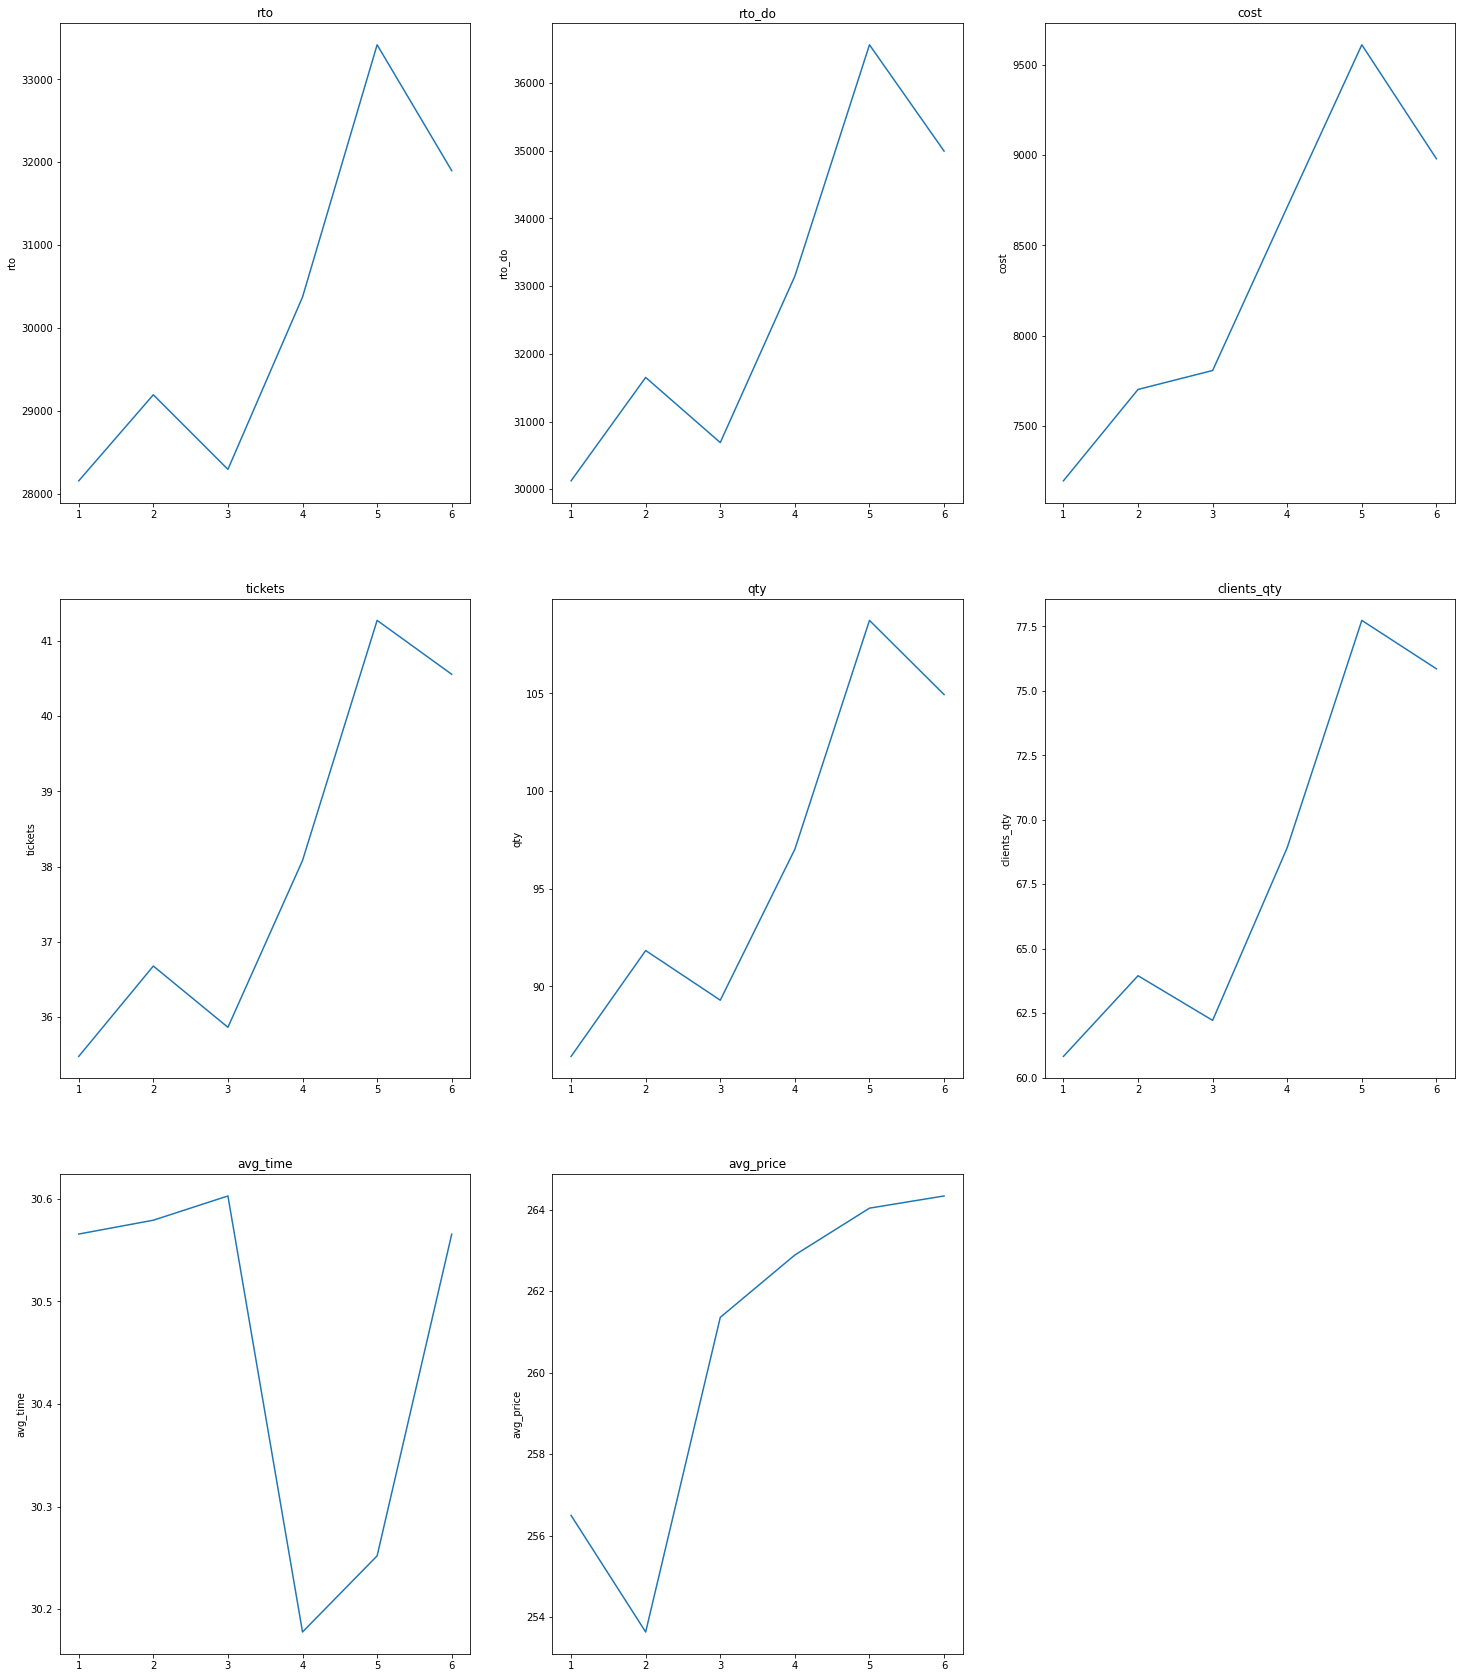

In [10]:
plt.figure(figsize=(25, 30))
plot_id=1
for feature in list(file_1.columns):
    plt.subplot(np.ceil(len(list(file_1.columns)) / 3),3,plot_id)
    sns.lineplot(data=file_1, x=file_1.index, y=feature)
    plt.title(feature )
    plt.xlabel("")
    plot_id+=1
plt.show()

Логичным выглядит падение в феврале марте из за мировой ситуации, также дальнейший рост основных показателей из за закрытия основных сетей фастфуда

Как можно оценить эффект от теста? 

Выбираем тестовую выборку

In [3]:
sp = ['Пенза', 'Уфа', 'Курск', 'Нижний Тагил', 'Новокуйбышевск', 'Орск']

In [4]:
file_test = file.loc[(file['CityName'].isin(sp))&(file['Date']>'2022-04-07')&(file['Date']<'2022-05-19')&(file['Category']=='пицца')&(file['OrderSource']=='web')]
file_test.head(2)

,Date,CityName,OrderSource,Category,rto,rto_do,cost,tickets,qty,clients_qty,avg_time,avg_price
297763,2022-04-08,Курск,web,пицца,36642.09,38191.5,8940.428,47.0,62.0,52.0,19.036901,591.00140
298199,2022-04-08,Нижний Тагил,web,пицца,45339.63,49827.3,12482.731,71.0,92.0,62.0,16.524553,492.82205


Выираем период такой же длины который был до нашего теста

In [5]:
file_test_before = file.loc[(file['CityName'].isin(sp))&(file['Date']>'2022-02-23')&(file['Date']<'2022-04-06')&(file['Category']=='пицца')&(file['OrderSource']=='web')]
file_test_before.head(2)

,Date,CityName,OrderSource,Category,rto,rto_do,cost,tickets,qty,clients_qty,avg_time,avg_price
166264,2022-02-24,Курск,web,пицца,19726.68,19521.33,4092.9202,25.0,32.0,28.0,21.050837,616.45874
166706,2022-02-24,Нижний Тагил,web,пицца,22576.29,23309.73,5081.1300,33.0,48.0,36.0,27.474297,470.33940


Контрольная

In [6]:
file_cntrl = file.loc[(~file['CityName'].isin(sp))&(file['Date']>'2022-04-07')&(file['Date']<'2022-05-19')&(file['Category']=='пицца')&(file['OrderSource']=='web')]
file_cntrl.head(2)

,Date,CityName,OrderSource,Category,rto,rto_do,cost,tickets,qty,clients_qty,avg_time,avg_price
296439,2022-04-08,Абакан,web,пицца,27949.14,26649.18,6805.6562,32.0,44.0,39.0,19.431475,635.2077
296451,2022-04-08,Абинск,web,пицца,7435.56,8537.43,2422.0234,16.0,20.0,12.0,27.543120,371.7780


In [7]:
file_cntrl_before = file.loc[(~file['CityName'].isin(sp))&(file['Date']>'2022-02-23')&(file['Date']<'2022-04-06')&(file['Category']=='пицца')&(file['OrderSource']=='web')]
file_cntrl_before.head(2)

,Date,CityName,OrderSource,Category,rto,rto_do,cost,tickets,qty,clients_qty,avg_time,avg_price
164974,2022-02-24,Абакан,web,пицца,22792.998,23153.52,5489.5195,26.0,36.0,20.0,24.632868,633.1388
164986,2022-02-24,Абинск,web,пицца,3845.490,4213.98,1061.5420,7.0,10.0,7.0,22.416098,384.5490


В контрольной выборке выберем только те города, в которых полное число строк за периоды

In [8]:
q_b = pd.DataFrame(file_cntrl_before.CityName.value_counts())
q = pd.DataFrame(file_cntrl.CityName.value_counts())
q = q.loc[q['CityName']==41]
q = q.loc[q_b['CityName']==41]
q = set(q.index)
q_b = set(q_b.index)
rz = list(q&q_b)
file_cntrl = file_cntrl.loc[(file_cntrl['CityName'].isin(rz))]
file_cntrl_before = file_cntrl_before.loc[(file_cntrl_before['CityName'].isin(rz))]

In [9]:
file_cntrl_before.CityName.unique()

array(['Абакан', 'Азов', 'Аксай Россия', 'Александров', 'Альметьевск',
       'Анапа', 'Ангарск', 'Апатиты', 'Апрелевка', 'Архангельск',
       'Астрахань', 'Балаково', 'Балашиха', 'Барнаул', 'Батайск',
       'Бердск', 'Березники', 'Благовещенск', 'Братск', 'Брянск',
       'Бугульма', 'Великий Новгород', 'Видное', 'Владивосток',
       'Владикавказ', 'Владимир', 'Волгоград', 'Волжский', 'Вологда',
       'Волхов', 'Воронеж', 'Воскресенск', 'Воткинск', 'Всеволожск',
       'Выборг', 'Вышний Волочек', 'Вязьма', 'Геленджик', 'Голицыно',
       'Горно-Алтайск', 'Губкин', 'Дедовск', 'Дзержинск', 'Дмитров',
       'Долгопрудный', 'Домодедово', 'Дубна', 'Екатеринбург', 'Ессентуки',
       'Железнодорожный', 'Жуковский', 'Звенигород', 'Зеленоград',
       'Златоуст', 'Иваново', 'Ивантеевка', 'Ижевск', 'Иркутск', 'Истра',
       'Йошкар-Ола', 'Казань', 'Калининград', 'Калуга',
       'Каменск-Уральский', 'Каменск-Шахтинский', 'Камышин', 'Кемерово',
       'Кингисепп', 'Кириши', 'Киров', 'Клин

Выберем такое же число городов, как и в тестовой выборке

In [10]:
spisok = ['Ростов-на-Дону', 'Рыбинск', 'Рязань',
       'Салават', 'Самара', 'Санкт-Петербург']

In [11]:
file_cntrl = file_cntrl.loc[(file_cntrl['CityName'].isin(spisok))]
file_cntrl_before = file_cntrl_before.loc[(file_cntrl_before['CityName'].isin(spisok))]  

Подготовимся к АБ тесту

Выберем парметр который будем анализировать

In [12]:
param = 'tickets'

In [13]:
def prepate_ab(data,param,before = False):
    file_test_X = data[['Date','CityName',param]]
    if before:
        file_test_X = file_test_X.rename(columns = {param:f'{param}_before'})
    file_test_X = file_test_X.reset_index(drop = True).reset_index()
    return file_test_X

In [14]:
def develop_prepare(file_test,file_test_before,file_cntrl,file_cntrl_before,param,before = False):
    file_test_X = prepate_ab(file_test,param,before = False)
    file_test_before_X = prepate_ab(file_test_before,param,before = True)
    file_cntrl_X = prepate_ab(file_cntrl,param,before = False)
    file_cntrl_before_X = prepate_ab(file_cntrl_before,param,before = True)
    return file_test_X,file_test_before_X,file_cntrl_X,file_cntrl_before_X
    

In [15]:
file_test_X = prepate_ab(file_test,param,before = False)
file_test_X.head(7)

,index,Date,CityName,tickets
0,0,2022-04-08,Курск,47.0
1,1,2022-04-08,Нижний Тагил,71.0
2,2,2022-04-08,Новокуйбышевск,38.0
3,3,2022-04-08,Орск,18.0
4,4,2022-04-08,Пенза,82.0
5,5,2022-04-08,Уфа,220.0
6,6,2022-04-09,Курск,76.0


In [16]:
file_test_before_X = prepate_ab(file_test_before,param,before = True)
file_test_before_X.head(7)

,index,Date,CityName,tickets_before
0,0,2022-02-24,Курск,25.0
1,1,2022-02-24,Нижний Тагил,33.0
2,2,2022-02-24,Новокуйбышевск,24.0
3,3,2022-02-24,Орск,14.0
4,4,2022-02-24,Пенза,67.0
5,5,2022-02-24,Уфа,106.0
6,6,2022-02-25,Курск,36.0


In [17]:
file_cntrl_X = prepate_ab(file_cntrl,param,before = False)
file_cntrl_X.head(7)

,index,Date,CityName,tickets
0,0,2022-04-08,Ростов-на-Дону,228.0
1,1,2022-04-08,Рыбинск,14.0
2,2,2022-04-08,Рязань,117.0
3,3,2022-04-08,Салават,20.0
4,4,2022-04-08,Самара,515.0
5,5,2022-04-08,Санкт-Петербург,1539.0
6,6,2022-04-09,Ростов-на-Дону,252.0


In [18]:
file_cntrl_before_X = prepate_ab(file_cntrl_before,param,before = True)
file_cntrl_before_X.head(7)

,index,Date,CityName,tickets_before
0,0,2022-02-24,Ростов-на-Дону,183.0
1,1,2022-02-24,Рыбинск,16.0
2,2,2022-02-24,Рязань,54.0
3,3,2022-02-24,Салават,12.0
4,4,2022-02-24,Самара,306.0
5,5,2022-02-24,Санкт-Петербург,818.0
6,6,2022-02-25,Ростов-на-Дону,205.0


In [19]:
def test_cntrl_X(file_test_X,file_test_before_X):
    text_X = file_test_X.merge(file_test_before_X, on = ['index','CityName'], how = 'inner')
    text_X = text_X.drop(['index','Date_x','Date_y'],axis = 1)
    return text_X

In [20]:
text_X = test_cntrl_X(file_test_X,file_test_before_X)
text_X.head(7)

,CityName,tickets,tickets_before
0,Курск,47.0,25.0
1,Нижний Тагил,71.0,33.0
2,Новокуйбышевск,38.0,24.0
3,Орск,18.0,14.0
4,Пенза,82.0,67.0
5,Уфа,220.0,106.0
6,Курск,76.0,36.0


In [21]:
cntrl_X = test_cntrl_X(file_cntrl_X,file_cntrl_before_X)
cntrl_X.head(7)

,CityName,tickets,tickets_before
0,Ростов-на-Дону,228.0,183.0
1,Рыбинск,14.0,16.0
2,Рязань,117.0,54.0
3,Салават,20.0,12.0
4,Самара,515.0,306.0
5,Санкт-Петербург,1539.0,818.0
6,Ростов-на-Дону,252.0,205.0


A/B тест

In [22]:
def a_b_test(text_X,cntrl_X,param):
    X = (cntrl_X[param]/text_X[param])/(cntrl_X[f'{param}_before']/text_X[f'{param}_before']) - 1
    inds_test = np.random.randint(len(X), size=(len(X), 10**5))
    inds_ctrl = np.random.randint(len(X), size=(len(X), 10**5))
    test_bef = text_X[f'{param}_before'].values[inds_test]
    test_aft = text_X[param].values[inds_test]
    ctrl_bef = cntrl_X[f'{param}_before'].values[inds_ctrl]
    ctrl_aft = cntrl_X[param].values[inds_ctrl]
    test_before_test_m = np.mean(test_bef,axis = 0)
    test_after_test_m = np.mean(test_aft,axis = 0)
    ctrl_before_test_m = np.mean(ctrl_bef,axis = 0)
    ctrl_after_test_m = np.mean(ctrl_aft,axis = 0)    
    X = (ctrl_after_test_m/test_after_test_m)/(ctrl_before_test_m/test_before_test_m) - 1
    left = np.quantile(X,0.025)
    right = np.quantile(X,0.975)
    meann = X.mean()
    line_sq = plt.hist(X,bins = 250,density = True);
    line_l = plt.axvline(left, color = 'r')
    line_r =plt.axvline(right, color = 'r',label = 'Доверительный интервал')
    line_1 = plt.axvline(meann, color = 'black',linestyle = ':',linewidth = 3,label = 'Среднее значение')
    line_l = plt.axvline(0, color = 'g',linestyle = '--',label = 'Значение 0')
    plt.xlabel('Прирост')
    plt.ylabel('Количество');
    plt.title('95% доверительный интервал для среднего значения')
    plt.legend()
    plt.show()
    print(f'параметр {param}, его среднее значение ',X.mean())

In [23]:
X = (cntrl_X[param]/text_X[param])/(cntrl_X[f'{param}_before']/text_X[f'{param}_before']) - 1
X.mean()

0.037514229695151106

In [24]:
inds_test = np.random.randint(len(X), size=(len(X), 10**5))
inds_ctrl = np.random.randint(len(X), size=(len(X), 10**5))
test_bef = text_X[f'{param}_before'].values[inds_test]
test_aft = text_X[param].values[inds_test]
ctrl_bef = cntrl_X[f'{param}_before'].values[inds_ctrl]
ctrl_aft = cntrl_X[param].values[inds_ctrl]

In [25]:
test_before_test_m = np.mean(test_bef,axis = 0)
test_after_test_m = np.mean(test_aft,axis = 0)
ctrl_before_test_m = np.mean(ctrl_bef,axis = 0)
ctrl_after_test_m = np.mean(ctrl_aft,axis = 0)

In [26]:
X = (ctrl_after_test_m/test_after_test_m)/(ctrl_before_test_m/test_before_test_m) - 1
X.mean()

-0.07441891451964967

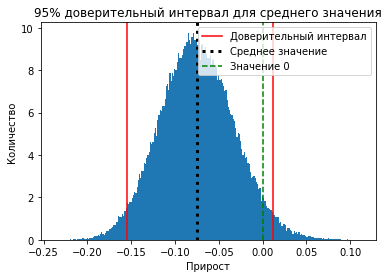

In [27]:
left = np.quantile(X,0.025)
right = np.quantile(X,0.975)
meann = X.mean()
line_sq = plt.hist(X,bins = 250,density = True);
line_l = plt.axvline(left, color = 'r')
line_r =plt.axvline(right, color = 'r',label = 'Доверительный интервал')
line_1 = plt.axvline(meann, color = 'black',linestyle = ':',linewidth = 3,label = 'Среднее значение')
line_l = plt.axvline(0, color = 'g',linestyle = '--',label = 'Значение 0')
plt.xlabel('Прирост')
plt.ylabel('Количество');
plt.title('95% доверительный интервал для среднего значения')
plt.legend()

Рассмотрим другие параметр

In [29]:
sp = file.iloc[:,4:].columns.tolist()

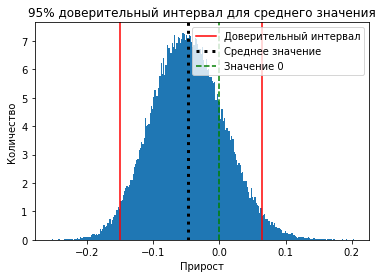

параметр rto, его среднее значение  -0.047099156451460934


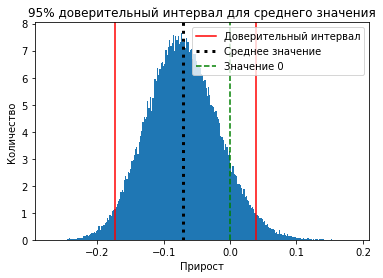

параметр rto_do, его среднее значение  -0.07100777665976996


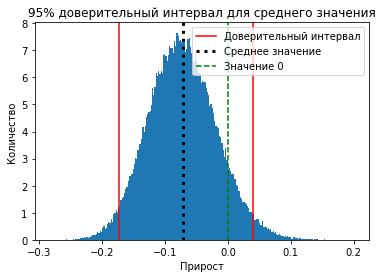

параметр cost, его среднее значение  -0.07214100907739943


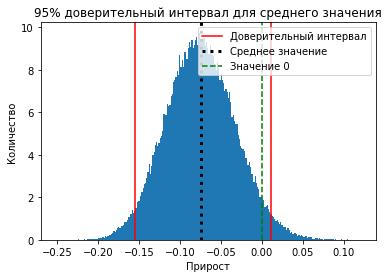

параметр tickets, его среднее значение  -0.07443610330153878


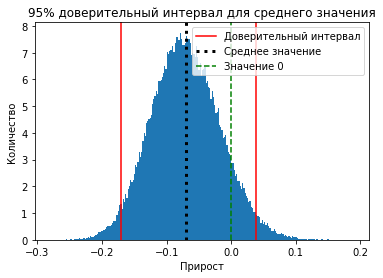

параметр qty, его среднее значение  -0.07013310749955426


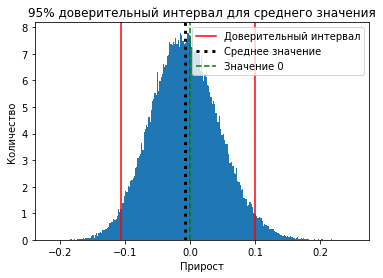

параметр clients_qty, его среднее значение  -0.007144735601181804


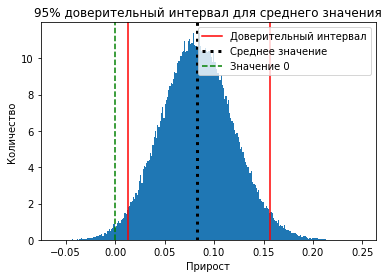

параметр avg_time, его среднее значение  0.08319579618398691


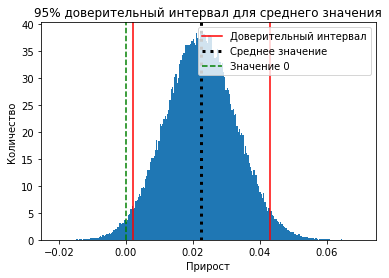

параметр avg_price, его среднее значение  0.022374087683333866


In [30]:
for i in sp:
    param = i
    file_test_X,file_test_before_X,file_cntrl_X,file_cntrl_before_X = develop_prepare(file_test,file_test_before,file_cntrl,file_cntrl_before,param,before = False)
    text_X = test_cntrl_X(file_test_X,file_test_before_X)
    cntrl_X = test_cntrl_X(file_cntrl_X,file_cntrl_before_X)
    a_b_test(text_X,cntrl_X,param) 

Как мы видим, значимые улучшение результатов получилось для   
avg_time -  среднее время сессии (только по тем, кто оформил заказ)  
avg_price - средняя цена

А для других параметров, тест показал не значимое на уровне 95% но все же ухудшение

Тест получился не совсем корректным, но некоторым причинам.  
Во первых дата проведения теста. На результат теста могли повлиять другие события  
ВО вторых выбор кородов на контроле. Нужно подбирать города не рандомно, а брать максимально похожие города. (Произвести стратификацию) 
Поэтому мы использовали метод CUPED для сглаживания этих проблем

4) Порассуждайте письменно, какие метрики можно было бы еще оценить, если бы вам были доступны все данные компании. 


Основные метрики которые, тоже важно знать и оптимизировать.  
1) Среднее время доставки  
2) Количество новых пользователей по реферальным ссылкам  
3) Количество новых пользователей по промоакциям (как например акция с фильмом Дюна или Бетмен)  
4) Воронку продаж. То есть сколько человек, зашли в приложение -> положили в корзину-> купили товар

## Задание 3

In [ ]:
### Собираем уникальных клиентов по дате и городу
with first_step as ( 
select   
cityname
, date
,count(DISTINCT(clientid)) as clientid
from data_test
groupby cityname,date)
### делаем оконную функцию 
select 
  cityname
, date
,clientid - LAG(clientid,1,0) OVER(PARTITION BY cityname,date ORDER BY cityname,date) AS 'True_clientid'
from first_step